In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [2]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

#Adding price column
boston['Price'] = boston_dataset.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
# splitting data to training and testing dataset

# Input Data 
x = boston_dataset.data 
   
# Output Data 
y = boston_dataset.target

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2) 
   
print("xtrain shape: ", xtrain.shape) 
print("xtest shape: ", xtest.shape) 
print("ytrain shape: ", ytrain.shape) 
print("ytest shape: ", ytest.shape) 

xtrain shape:  (404, 13)
xtest shape:  (102, 13)
ytrain shape:  (404,)
ytest shape:  (102,)


In [5]:
# Fitting Linear regression model to training model 
lr = LinearRegression() 
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# predicting price 
y_pred = lr.predict(xtest) 

In [7]:
# Calculating performance of Linear Regression model. 

from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error: ', metrics.mean_absolute_error(ytest, y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(ytest, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print('R squared error:', r2_score(ytest, y_pred))

Mean Absolute Error:  3.194823797915894
Mean Square Error:  23.94473655200689
RMSE: 4.893335932879214
R squared error: 0.6411656021227035


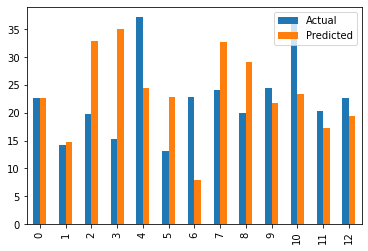

In [10]:
#Actual Value Vs Predicted Value
df1 = pd.DataFrame({'Actual': ytest, 'Predicted':y_pred})
df2 = df1.head(13)
df2.plot(kind = 'bar')